|--- thalassemia_Fixed Defect <= 0.50
|   |--- chest_pain_type_Typical angina <= 0.50
|   |   |--- Max_heart_rate <= 143.00
|   |   |   |--- oldpeak <= 0.25
|   |   |   |   |--- class: 1
|   |   |   |--- oldpeak >  0.25
|   |   |   |   |--- class: 0
|   |   |--- Max_heart_rate >  143.00
|   |   |   |--- oldpeak <= 2.40
|   |   |   |   |--- class: 1
|   |   |   |--- oldpeak >  2.40
|   |   |   |   |--- class: 0
|   |--- chest_pain_type_Typical angina >  0.50
|   |   |--- oldpeak <= 0.55
|   |   |   |--- cholestoral <= 237.50
|   |   |   |   |--- class: 1
|   |   |   |--- cholestoral >  237.50
|   |   |   |   |--- class: 0
|   |   |--- oldpeak >  0.55
|   |   |   |--- thalassemia_Normal <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- thalassemia_Normal >  0.50
|   |   |   |   |--- class: 0
|--- thalassemia_Fixed Defect >  0.50
|   |--- vessels_colored_by_flourosopy_Zero <= 0.50
|   |   |--- chest_pain_type_Typical angina <= 0.50
|   |   |   |--- oldpeak <= 2.25
|   |   |   |   |--

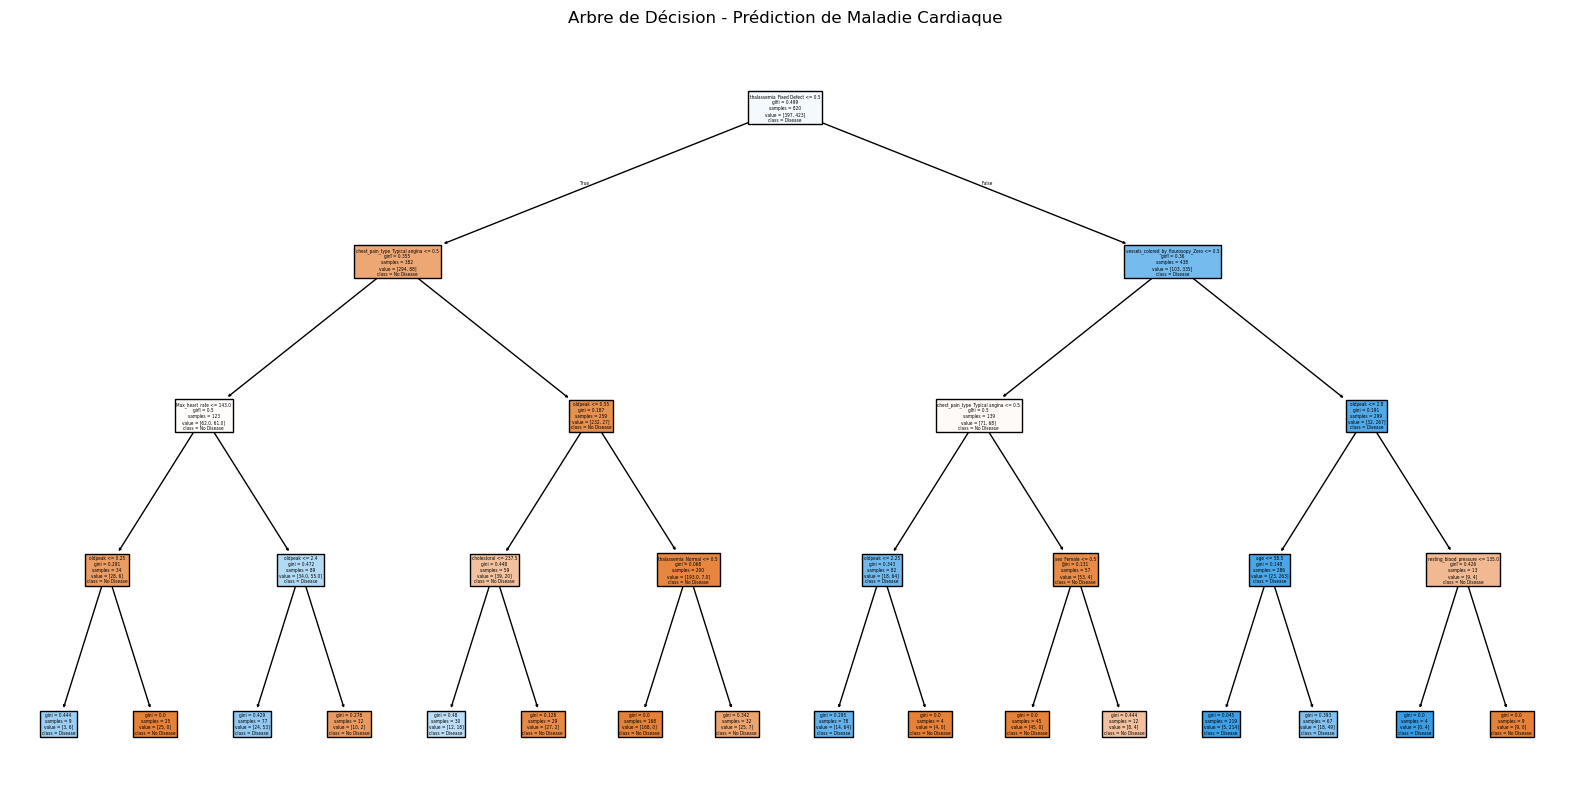

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# 1. تحميل البيانات
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

# 2. تحضير البيانات (ببساطة: إزالة القيم النصية إن وجدت أو تحويلها إلى أرقام)
df = df.dropna()  # حذف القيم المفقودة

# تشفير الخصائص النصية إن وجدت
df = pd.get_dummies(df)

# 3. تقسيم البيانات
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. إنشاء النموذج
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# 5. عرض الشجرة كنص
print(export_text(tree_model, feature_names=list(X.columns)))

# 6. رسم الشجرة
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Arbre de Décision - Prédiction de Maladie Cardiaque")
plt.show()
